In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, KFold, RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score,recall_score

**Ejercicios de algoritmos de Clasificación.**

* Limpieza e interpretación de los datos.
* Preprocesados.
* Creación de modelos de clasificación (árboles de clasificación, KNN - k-Nearest neighbors, regresión logística, support vector machine, XGboost, otros modelos...).
* Utilización de las métricas para interpretar los resultados.
* Estudio y modificación de parámetros.

# Ejercicio 1
Crea al menos dos modelos de clasificación diferentes para intentar predecir el mejor posible para las clases del archivo adjunto.

# Solución

In [195]:
df=pd.read_csv('wineData.txt', header=None, names=['Class label','Alcohol','Malic acid',
                                                   'Ash','Alcalinity of ash',
                                                   'Magnesium', 'Total phenols',
                                                   'Flavanoids', 'Nonflavanoid phenols',
                                                   'Proanthocyanins','Color intensity',
                                                   'Hue','OD280/OD315 of diluted wines','Proline'])
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Estos datos son el resultado de un análisis químico de vinos cultivados en la misma región de Italia pero derivados de tres cultivos diferentes. El análisis determinó las cantidades de 13 constituyentes que se encuentran en cada uno de los tres tipos de vinos

El prpósito del siguiente ejercicio es crear un modelo de clasificación. Es decir, dadas las propiedades de un cierto vino predecir a que tipo (1, 2, 3) pertenece este vino. 

**Class label**: es la variable de salida/predictora

|Variable|Descripción|
|--------|-----------|
|Class label | Etiqueta de clase|
|Alcohol | Alcohol|
|Malic acid | Ácido málico|
|Ash | Cenizas|
|Alcalinity of ash | Alcalinidad de las cenizas|
|Magnesium | Magnesio|
|Total phenols | Fenoles totales|
|Flavanoids | Flavonoides|
|Nonflavanoid phenols | Fenoles no flavonoides|
|Proanthocyanins | Proantocianinas|
|Color intensity | Intensidad de color|
|Hue | Tonalidad|
|OD280/OD315 of diluted wines | DO280/OD315 de vinos diluidos|
|Proline | Prolina|  

## 1.1 EDA

1. Verificar si existen valores nulos.

In [196]:
df.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

2. Observar los tipos de datos de cada columna.

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [197]:
# convertir la variable Class label a categórica.
df['Class label']=df['Class label'].astype('int64').astype('category')

In [198]:
# Fecuencia de Class label
freq=df['Class label'].value_counts()
freq

2    71
1    59
3    48
Name: Class label, dtype: int64

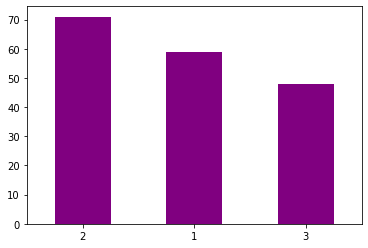

In [167]:
# Gráfico de frecuancias.
freq.plot(kind='bar',color='purple')
plt.xticks(rotation=360);

3. Mostrar descripción estadística de las variables.

In [168]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.00,0.81,11.03,12.36,13.05,13.68,14.83
Malic acid,178.0,2.34,1.12,0.74,1.60,1.87,3.08,5.80
Ash,178.0,2.37,0.27,1.36,2.21,2.36,2.56,3.23
Alcalinity of ash,178.0,19.49,3.34,10.60,17.20,19.50,21.50,30.00
Magnesium,178.0,99.74,14.28,70.00,88.00,98.00,107.00,162.00
Total phenols,178.0,2.30,0.63,0.98,1.74,2.36,2.80,3.88
Flavanoids,178.0,2.03,1.00,0.34,1.20,2.13,2.88,5.08
Nonflavanoid phenols,178.0,0.36,0.12,0.13,0.27,0.34,0.44,0.66
Proanthocyanins,178.0,1.59,0.57,0.41,1.25,1.56,1.95,3.58
Color intensity,178.0,5.06,2.32,1.28,3.22,4.69,6.20,13.00


A excepción de **Class label**, las demás variables son numéricas.

4. Correlación entre todas y cada una de las variables.

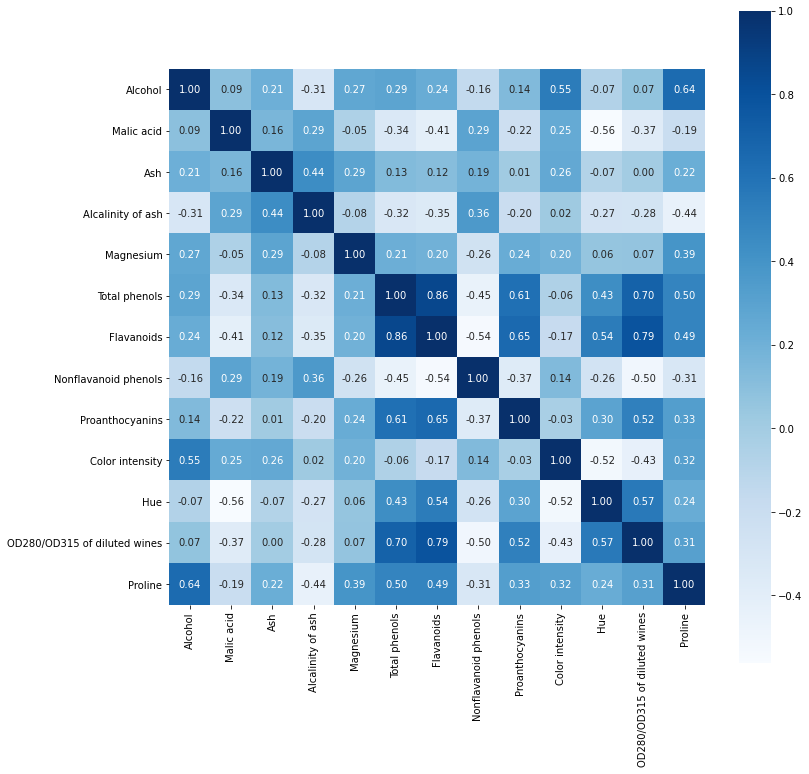

In [169]:
corr=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='Blues',annot_kws={'size':10},fmt='.2f',square=True);

Los valores van de -1 a 1, si un valor se apróxima a 1 tendrá una correlación positiva(fuerte)  y si se apróxima a -1, tendra una correlación negativa(débil). 

Algunas características tienen una correlación lineal bastante elevada:

* flavanoids & total phenols = 0.86
* flavanoids & od280/od315_of_diluted_wines = 0.79

Por ejemplo, si es necesario reducir las características, podemos usar sólo los **Flavanoids** y no utilizar las otras dos. 

5. Para tener una mejor idea de las correlaciones, hagamos también un diagrama pairplot.

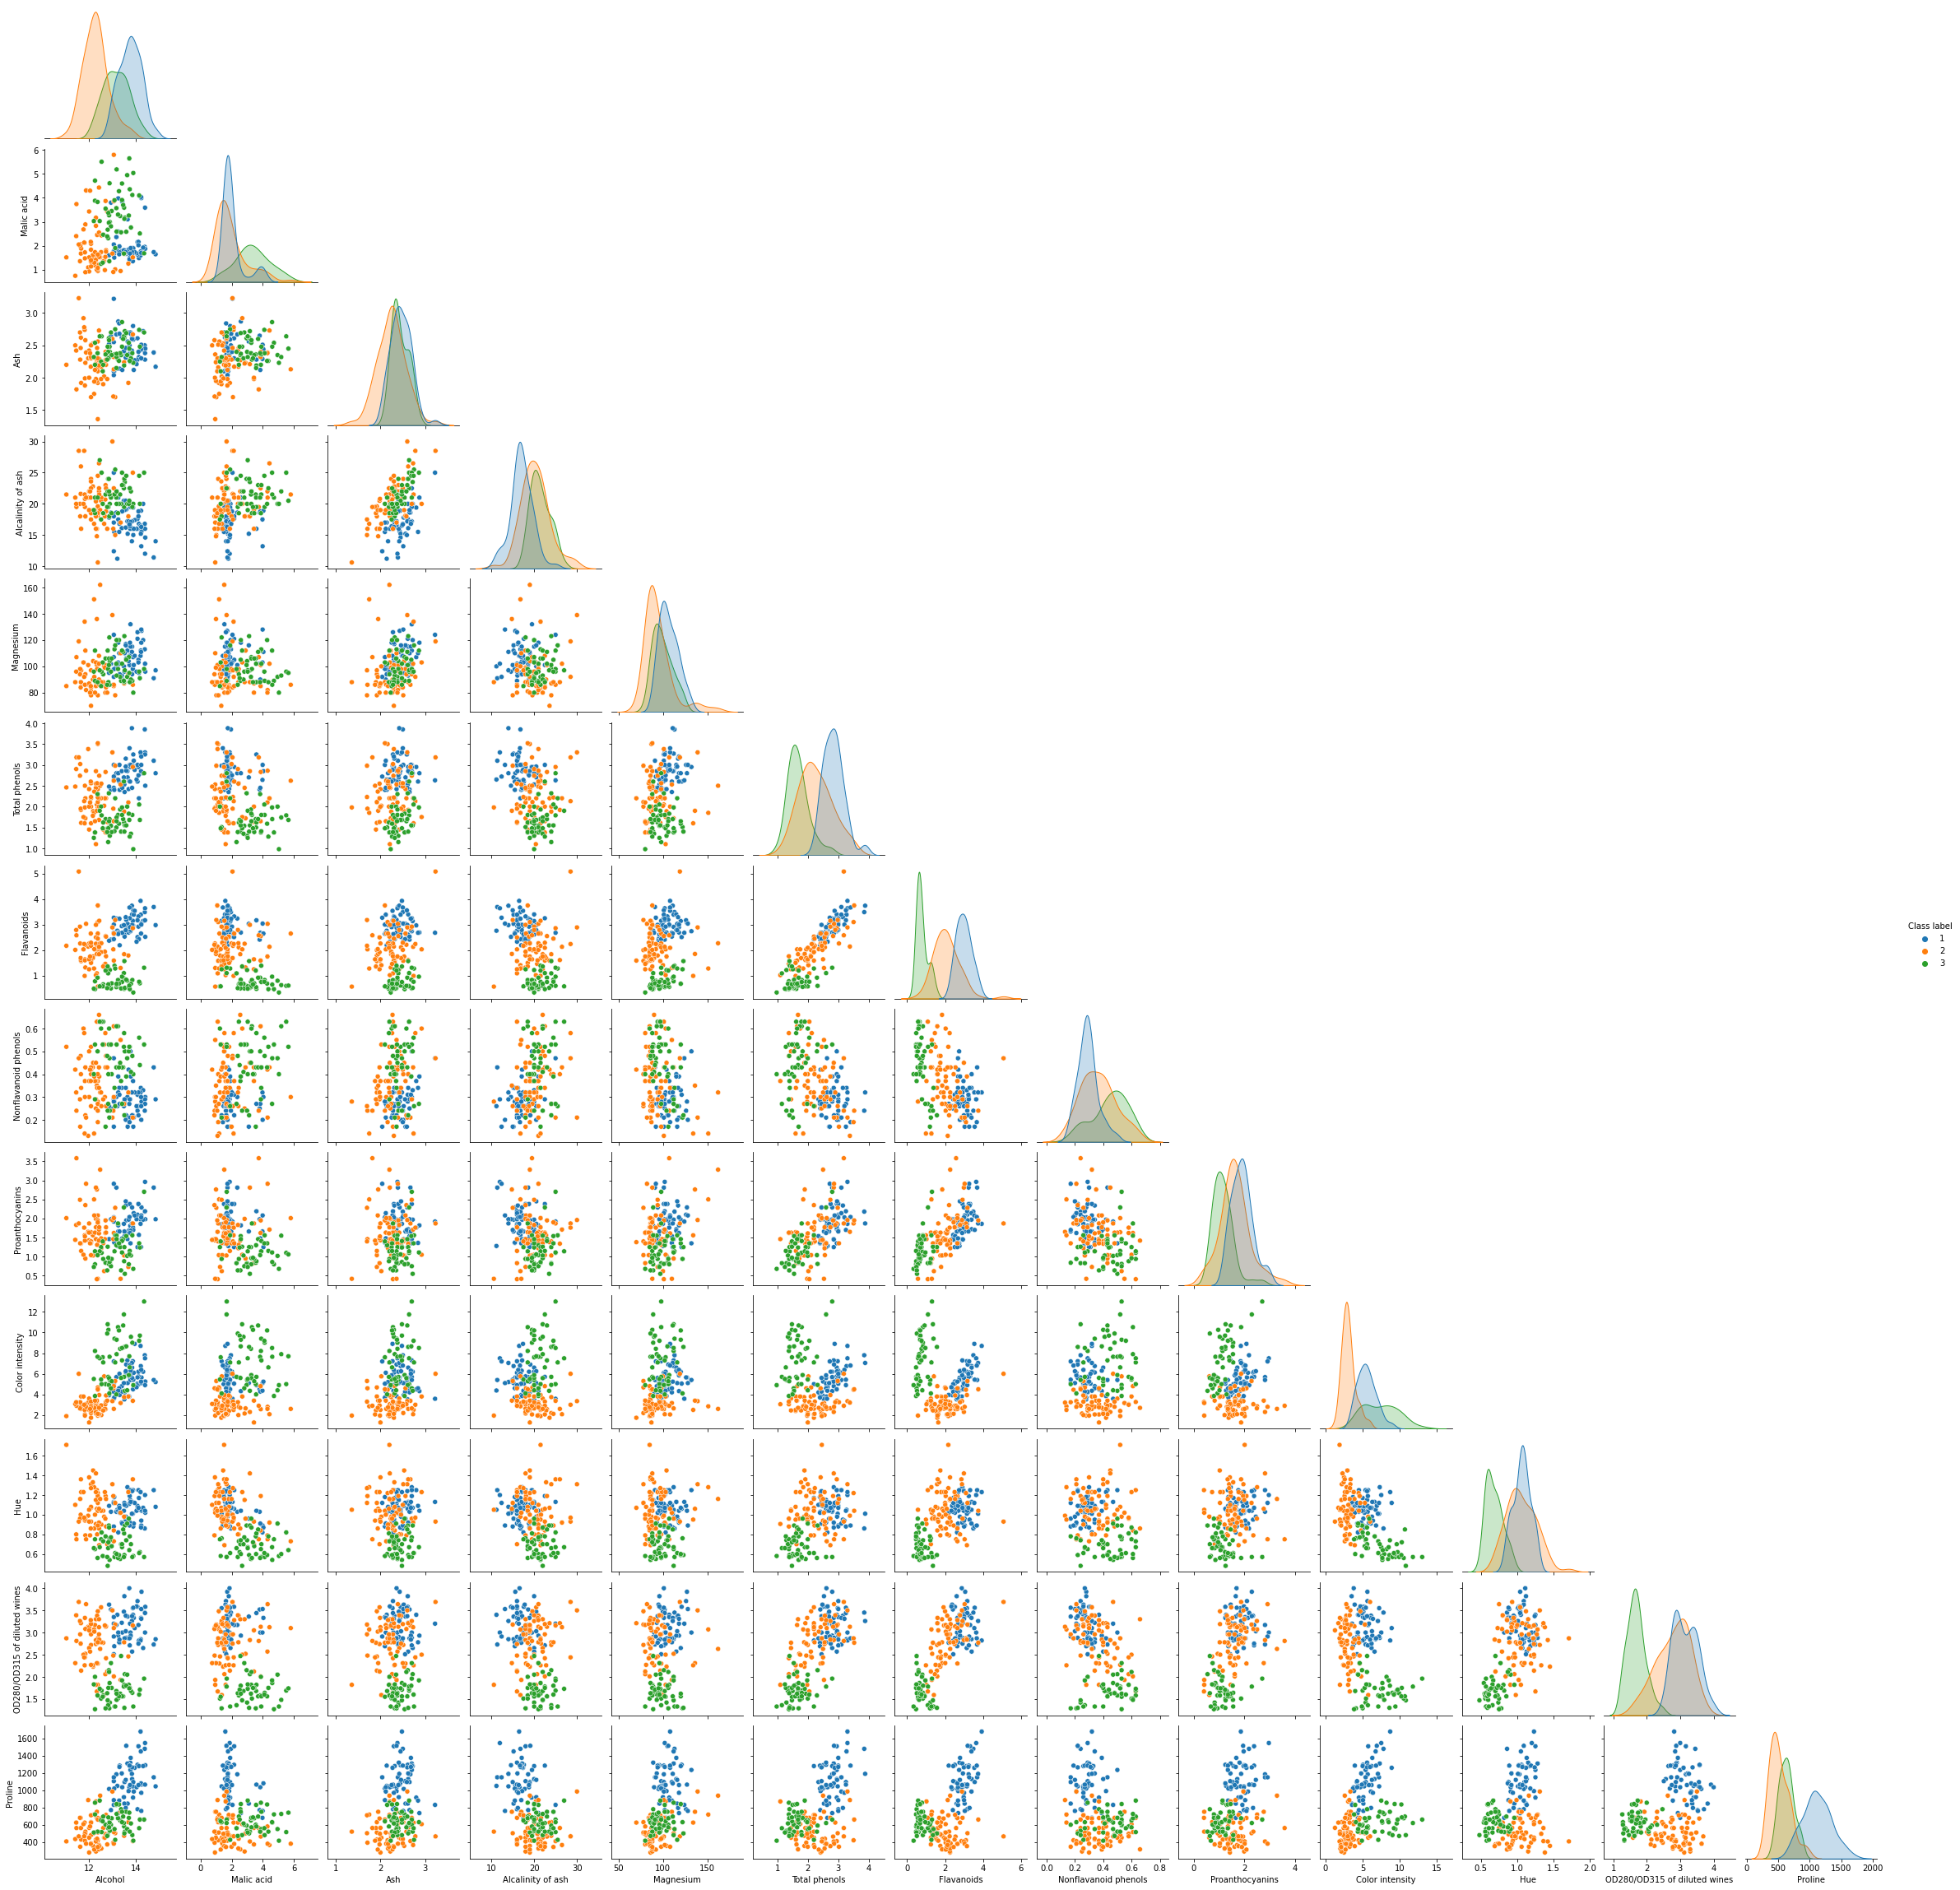

In [50]:
sns.pairplot(df, 
             hue='Class label', 
             palette="tab10", 
             corner=True)

plt.show()

Se puede ver que algunas características separan bastante bien las clases. Por ejemplo, **proline** parece ser una variable bastante explicativa, especialmente para el vino 1 (puntos azules). También **Color intensity**, junto con **flavanoids** y  **Total phenols**, separan bastante bien las clases.

## 1.2 Construcción de modelos de clasificación

1. La variable objetivo será la columna **Class label**. Por lo tanto, la extraemos de la siguiente manera:

In [200]:
y=df['Class label'].values

In [201]:
X=df.iloc[:,1:14]

2. Crear un función para evaluar nuestros modelos.

In [202]:
# X: Coonjunto que será dividido en conjunto de prueba y entrenamiento
# y: Conjunto objetivo
# model: tipo de modelo (LinnearRegression, Lasso, RandomForest, etc...)
# trainSize: tamaño de datos de entrenamiento (0.6, 0.7, 0.8)  
# testSize: tamaño de datos de prueba (0.4, 0.3, 0.2)
# trainSize + testSize, debe ser igual a 1.
trainSize,testSize = 0.7, 0.3
def class_model(model,X,y):
    # Crear conjuntos entrenamiento y prueba
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,train_size=trainSize,test_size=testSize, random_state=13)
    # Crear el modelo
    classification=model
    # Ajustar el modelo a los conjuntos de entrenamiento
    classification.fit(Xtrain,ytrain)
    # Predecir a partir de los datos de prueba
    ypred=classification.predict(Xtest)    
    return ytest, ypred

3. Crear lista de modelos de clasificación

In [203]:
name_model=[GaussianNB(),
            SVC(kernel='linear',random_state=0),
            DecisionTreeClassifier(criterion='entropy',random_state=0)]

### 1.2.1 Gaussian naive Bayes

  * <p style='color:blue'>Aplicar algoritmo de clasificación.</p>

In [204]:
ytest_Gauss,ypred_Gauss=class_model(name_model[0],X,y)

  * <p style='color:blue'>Crear un DataFrame con ytest_Gauss y ypred_Gauss para luego encontrar los valores de las filas que son diferentes.</p>

In [205]:
df_gauss=pd.DataFrame({'objetivo':ytest_Gauss,'predicho':ypred_Gauss})
df_gauss[df_gauss.objetivo != df_gauss.predicho]


,objetivo,predicho
49,2,3


Se puede ver que en la fila 49 el valor objetivo es la clase 2 pero el algirtmo a predicho el valor 3. 

* <p style='color:blue'>Vamos a mirar el tamaño de cada clase en la columna objetivo predicho.</p>

In [206]:
print(df_gauss.groupby('objetivo').size(),'\n')
print(df_gauss.groupby('predicho').size())

objetivo
1    18
2    23
3    13
dtype: int64 

predicho
1    18
2    22
3    14
dtype: int64


Se puede observar que en la clase 1 hay un 100% de acierto, mientras que en las clases 2 y 3 no, hay una diferencia de 1 y -1 para las clases 2 y 3 respectivamente.

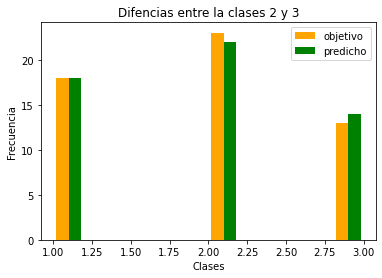

In [207]:
colors = ['orange','g']
plt.hist([ytest_Gauss, ypred_Gauss], color=colors, label=['objetivo', 'predicho'])
plt.legend(loc='upper right')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Difencias entre la clases 2 y 3')
plt.show()

<p style='color:blue'>En el gráfico podemos ver la diferencia que exite en las clases 2 y 3, las barras naranjas son las clases de nuestra variable objetivo y las verdes las clases de nuestra variable predicha. Este algoritmo de clasificación no esta mal, pues como vemos solo hay una fila con valores diferentes.</p>

### 1.2.2 Máquinas de Vector Soporte SVM

In [208]:
ytest_svm, ypred_svm = class_model(name_model[1],X,y)

In [209]:
df_svm=pd.DataFrame({'objetivo':ytest_svm,'predicho':ypred_svm})
df_svm[df_svm.objetivo != df_svm.predicho]

,objetivo,predicho
19,2,1
42,2,1
49,2,1


In [210]:
print(df_svm.groupby('objetivo').size(),'\n')
print(df_svm.groupby('predicho').size())

objetivo
1    18
2    23
3    13
dtype: int64 

predicho
1    21
2    20
3    13
dtype: int64


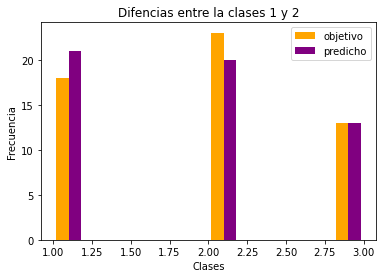

In [211]:
colors = ['orange','purple']
plt.hist([ytest_svm, ypred_svm], color=colors, label=['objetivo', 'predicho'])
plt.legend(loc='upper right')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Difencias entre la clases 1 y 2')
plt.show()

<p style='color:blue'>En el gráfico podemos ver que este algoritmo de clasificación resulto ser menos efectivo que el algoritmo <strong>Gaussian naive Bayes</strong>, pues existen 3 valores clasificados que son diferentes. La mala clasificación de estos valores se ven en las clases uno y dos.</p>

### 1.2.3 DecisionTreeClassifier

In [214]:
ytest_dtc, ypred_dtc = class_model(name_model[2],X,y)

In [215]:
df_dtc=pd.DataFrame({'objetivo':ytest_dtc,'predicho':ypred_dtc})
df_dtc[df_dtc.objetivo != df_dtc.predicho]

,objetivo,predicho
2,3,1
18,1,2
44,1,2


In [216]:
print(df_dtc.groupby('objetivo').size(),'\n')
print(df_dtc.groupby('predicho').size())

objetivo
1    18
2    23
3    13
dtype: int64 

predicho
1    17
2    25
3    12
dtype: int64


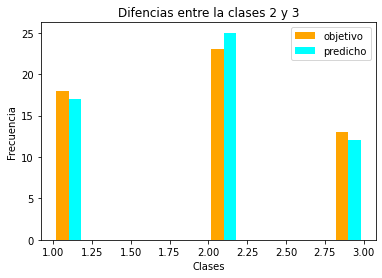

In [217]:
colors = ['orange','cyan']
plt.hist([ytest_dtc, ypred_dtc], color=colors, label=['objetivo', 'predicho'])
plt.legend(loc='upper right')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Difencias entre la clases 2 y 3')
plt.show()

<p style='color:blue'>En el gráfico podemos ver que este algoritmo de clasificación resulto ser menos efectivo que el algoritmo <strong>Gaussian naive Bayes</strong>, pues existen existen diferentes clasificaciones para las 3 clases. Una mamera de ver una óptima clasificación es que las barras de las clases coincidan.</p>

<p style='color:purple'>Por el momento con los diferentes parámetros para los tres modelos de clasificación, el algoritmo de  <strong>Gaussian naive Bayes</strong> es el mejor</p>

# Ejercicio 2
Compare los modelos de clasificación utilizando la precisión (**accuracy**), una matriz de confusión y otras métricas más avanzadas.

# Solución

### Métricas de evaluación para tareas de clasificación

#### Matriz de confusión

La matriz de confusión es una tabla que contiene el rendimiento del modelo, y se describe del siguiente modo:

- Las columnas representan las instancias que pertenecen a una clase predicha.

- Las filas se refieren a las instancias que realmente pertenecen a esa clase ( verdad absoluta).

La configuración que presentan las matrices de confusión permite al usuario detectar rápidamente las áreas en las que el modelo está teniendo mayores dificultades. 

Teniendo en cuenta que las filas de una matriz de confusión se refieren a la ocurrencia o no de un suceso, y las columnas a las predicciones del modelo, los valores de la matriz de confusión pueden explicarse del siguiente modo:

- Verdaderos positivos (TP): Se refiere a los casos en los que el modelo clasificó correctamente el suceso como positivo; por ejemplo, los casos clasificados correctamente como embarazada.

- Falsos positivos (FP): se refiere a los casos en los que el modelo clasificó incorrectamente el suceso como positivo; por ejemplo, los casos de no embarazada clasificados incorrectamente como embarazada.

- Verdaderos negativos (TN): Representa los casos en los que el modelo clasificó correctamente el suceso como negativo; por ejemplo, los casos clasificados correctamente como no embarazada.

- Falsos negativos (FN): Se refiere a los casos en los que el modelo clasificó incorrectamente el suceso como negativo; por ejemplo, los casos de embarazo que se predijeron incorrectamente como no embarazo.

Los valores de la matriz de confusión pueden ilustrarse del siguiente modo:

![matrix-confusion](matrix_conf.png)

#### Accuracy

La precisión, como se ha explicado anteriormente, mide la capacidad del modelo para clasificar correctamente todas las instancias. 

El nivel de precisión de la matriz de confusión de la Figura anterior se mide de la siguiente manera:

$$\text{Accuracy}=\frac{TP+TN}{n},\qquad n:\text{número total de  instancias.}$$

#### Precision

Esta métrica mide la capacidad del modelo para clasificar correctamente las etiquetas positivas (la etiqueta que representa la ocurrencia del suceso) comparándola con el número total de instancias predichas como positivas. Se representa mediante la relación entre los verdaderos positivos y la suma de los verdaderos positivos y los falsos positivos, como se muestra en la siguiente ecuación:

$$\text{Precision}=\frac{TP}{TP+FP}.$$

#### Recall

La métrica recall mide el número de etiquetas positivas predichas correctamente frente a todas las etiquetas positivas. Se representa mediante la relación entre los verdaderos positivos y la suma de verdaderos positivos y falsos negativos:

$$\text{Recall}=\frac{TP}{TP+FN}.$$



1. Crear función de diferentes medidas de puntuación

In [218]:
def class_score(y_test,y_pred):
    print('Accuracy:',accuracy_score(y_test, y_pred))
    print('recall_score:',recall_score(y_test, y_pred,average=None))
    print('precision_score:',precision_score(y_test, y_pred,average=None))
    print('f1_Score:',f1_score(y_test, y_pred,average=None))
    precision_score

2. Crear función que grafique la matriz de confusión

In [219]:
def conf_matrix(ytest,ypred):
    print('Matriz de confusión')
    CM_model = confusion_matrix(ytest,ypred)
    # Crear la visualización de la matriz de confusión
    cm_display = ConfusionMatrixDisplay(confusion_matrix = CM_model, display_labels = [1, 2,3])
    # Graficar la matriz de confusión
    cm_display.plot()
    plt.show()

3. Evaluar modelos con las dos funciones creadas en los pasos 1 y 2.

### 2.1 Gaussian naive Bayes  

In [220]:
class_score(ytest_Gauss,ypred_Gauss)

Accuracy: 0.9814814814814815
recall_score: [1.         0.95652174 1.        ]
precision_score: [1.         1.         0.92857143]
f1_Score: [1.         0.97777778 0.96296296]


Pdemos ver que con la métrica Accuracy tenemos un 98% de efectividad en la predicción. 

Matriz de confusión


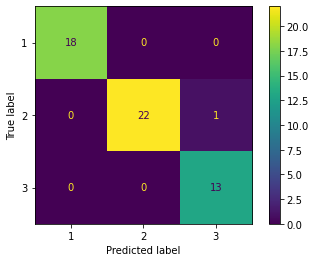

In [221]:
conf_matrix(ytest_Gauss,ypred_Gauss)

Se pede ver que en la posición [2,3] de la matriz hay un 1, esto quiere decir que el algoritmo predijo la clase 3, pero el valor real es la clase 2 (ver DataFrame df_Gauss fila 49). 

### 2.2 Máquinas de Vector Soporte SVM

In [222]:
class_score(ytest_svm,ypred_svm)

Accuracy: 0.9444444444444444
recall_score: [1.         0.86956522 1.        ]
precision_score: [0.85714286 1.         1.        ]
f1_Score: [0.92307692 0.93023256 1.        ]


Pdemos ver que con la métrica Accuracy tenemos un 94% de efectividad en la predicción. 

Matriz de confusión


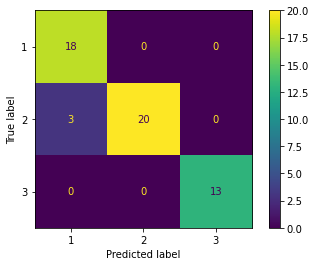

In [223]:
conf_matrix(ytest_svm,ypred_svm)

Se pede ver que en la posición [2,1] de la matriz hay un 3, esto quiere decir que el algoritmo predijo 3 valores con clase 1, pero los valores reales son la clase 2 (ver DataFrame df_svm filas 19, 42 y 49). 

### 2.3 DecisionTreeClassifier

In [226]:
class_score(ytest_dtc,ypred_dtc)

Accuracy: 0.9444444444444444
recall_score: [0.88888889 1.         0.92307692]
precision_score: [0.94117647 0.92       1.        ]
f1_Score: [0.91428571 0.95833333 0.96      ]


Pdemos ver que con la métrica Accuracy tenemos un 98% de efectividad en la predicción. 

Matriz de confusión


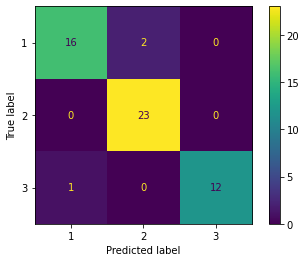

In [227]:
conf_matrix(ytest_dtc,ypred_dtc)

Se pede ver que en la posición [3,1] de la matriz hay un 1, esto quiere decir que el algoritmo predijo la clase 1, pero el valor real es la clase 3. 

<p style='color:purple'>En conclusión podemos decir, que para este dataset con estás métricas, el modelo de clasificación  <strong>Gaussian naive Bayes</strong> con los parámetros que ingresamos es el mejor</p>

# Ejercicio 3
Entrénelos usando los diferentes parámetros que admiten para mejorar la predicción.

##  Valiación cruzada (Cross-Validation)

La validación cruzada también es un procedimiento que se utiliza para dividir los datos mediante un nuevo muestreo de los datos utilizados para entrenar y validar el modelo. Consta de un parámetro, K, que representa el número de grupos en que se dividirá el conjunto de datos.

Debido a esto, el procedimiento también se conoce como validación cruzada K-fold, donde K se suele remplazar por un número de su elección. Por ejemplo, un modelo creado mediante un procedimiento de validación cruzada de 10 veces significa un modelo en el que los datos se dividen en 10 subgrupos. El procedimiento de validación cruzada se ilustra de la siguiente manera:

1. Los datos se mezclan aleatoriamente, teniendo en cuenta que el proceso de validación cruzada se repite.

2. Los datos se dividen en K subgrupos. 

3. El conjunto de validación/prueba se selecciona como uno de los subgrupos creados. El resto de subgrupos se convierte en el conjunto de entrenamiento.

4. El modelo se entrena en el conjunto de entrenamiento, como de costumbre. El modelo se evalúa utilizando el conjunto de validación/prueba.

5. Se guarda el resultado de esa iteración. Los parámetros se ajustan en función de los resultados y el proceso vuelve a empezar reorganizando los datos. Este proceso se repite K veces.

![k-fold](kfolds.png)

# Solución

Cambiaremos los diferentes parámetros de nuestros modelos para ver si mejoran en la predicción. Para este propósito utillizaremos el método **get_paramas()** para obtener información de los diferentes parámetros que admiten nuestros modelos. Por último, iremos modificando estos parámetros para que nuestros mdelos puedan mejorar su predicción.

### 2.3 SVC
1. Obtener Hiperparámetros:

In [228]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

2. Inicializar el clasificador SVC con su hiperparametrización por defecto:

In [229]:
svc_default = SVC()

3. Introduzca este clasificador en una validación cruzada (cv) de 10 pliegues, calculando la puntuación de precisión para cada pliegue. 

In [230]:
cv_svc_default = cross_val_score(svc_default, X, y, cv=10, scoring='f1_macro')
print(cv)

1.069


4. Calcule e imprima la puntuación media de precisión para todos los pliegues. Esto nos dará una idea del rendimiento global del modelo.

In [231]:
print(round(cv_svc_default.mean(), 4))

0.6465


<p style='color:#53063d'>Se observa que la puntuación media se acerca al 65%. ¿Se puede mejorar?</p>

5. Ejecutar de nuevo el clasificador, esta vez estableciendo el hiperparámetro kernel **poly** de grado dos. 

In [232]:
svc_poly = SVC(kernel = 'poly', degree = 2)

In [233]:
cv_svc_poly = cross_val_score(svc_poly, X, y, cv=10, scoring='f1_macro')
print(round(cv_svc_poly.mean(), 4))

0.5853


El resultado es peor (un 6% menos):

6. ¿Qué ocurre si modifiquemos el kernel a **linear**?, Ejecutemos de nuevo todo el código, esta vez con la siguiente hiperparametrización:

In [234]:
cv_svc_linear = cross_val_score(SVC(kernel='linear'), X, y, cv=10, scoring='f1_macro')
print(round(cv_svc_linear.mean(), 4))

0.9556


¿Ha mejorado el rendimiento?

Hay una mejora sustancial en el cambio de la hiperparametrización por defecto( kernel='rbf') porque la salida es: 96%

<p style='color:#53063d'>Por lo tanto, podemos concluir - por el momento - que  este el modelo óptimo en este caso.</p>

### Ventajas 
Este proceso manual ofrece más control. A medida que avanza en el proceso, puede hacerse una idea de cómo podrían funcionar sus estimadores con diferentes hiperparámetros, lo que significa que puede ajustarlos de acuerdo con sus expectativas sin tener que probar un gran número de posibilidades innecesariamente. 

### desventajas
Eesta estrategia sólo es factible cuando hay un pequeño número de posibilidades que probar. Cuando el número de posibilidades supera en cinco, esta estrategia resulta demasiado laboriosa para ser práctica.

# Ejercicio 4
Compare su rendimiento empleando la aproximación train/test o cross-validation.

# Solución

### Optimizar el Clasificador SVC con GridSearchCV y Cross-validation

1. Inicializar el estimador.

In [246]:
clr = SVC()

2. A continuación definimos la rejilla, la rejilla contiene el kernel **linear** (núcleo del algormo), **tol** (criterio de parada) y **C** (parámetro de regularización).

In [247]:
grid = [{'tol': [1/np.power(10,i) for i in np.arange(1,10)]},
        {'C':[np.power(10,i) for i in np.arange(10)]},
        {'kernel': ['linear']},
       ]

Para configurar la búsqueda, pasamos el estimador recién inicializado y nuestra cuadrícula de hiperparámetros a **GridSearchCV()**. También debemos especificar una métrica de puntuación, que es el método que se utilizará para evaluar el rendimiento de las distintas hiperparametrizaciones probadas durante la búsqueda.

Lo último que hay que hacer es establecer el número de divisiones que se utilizarán utilizando la validación cruzada mediante el argumento **cv**. Lo estableceremos en 10, realizando así una validación cruzada de 10 veces:

3. Configurar la búsqueda de rejilla.

In [248]:
gscv = GridSearchCV(estimator=clr, param_grid=grid, scoring='f1_macro', cv=10)

4. Introducir datos en este objeto a través de su método fit(). Una vez hecho esto, se iniciará el proceso de búsqueda en la cuadrícula:

In [249]:
gscv.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07,
                                  1e-08, 1e-09]},
                         {'C': [1, 10, 100, 1000, 10000, 100000, 1000000,
                                10000000, 100000000, 1000000000]},
                         {'kernel': ['linear']}],
             scoring='f1_macro')

5. Convertir el diccionario de **gscv.cv_results_** en un Dataframe:

In [250]:
results = pd.DataFrame(gscv.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tol,param_C,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005654,0.001595,0.004708,0.001331,0.1,NaN,NaN,{'tol': 0.1},0.614719,0.646317,...,0.614164,0.610101,0.649351,0.65,0.82754,0.847222,0.574074,0.658587,0.094398,11
1,0.004102,0.000294,0.003339,0.000380,0.01,NaN,NaN,{'tol': 0.01},0.614719,0.646317,...,0.614164,0.610101,0.585714,0.65,0.82754,0.790476,0.574074,0.646549,0.086427,12
2,0.003983,0.000137,0.003438,0.000400,0.001,NaN,NaN,{'tol': 0.001},0.614719,0.646317,...,0.614164,0.610101,0.585714,0.65,0.82754,0.790476,0.574074,0.646549,0.086427,12
3,0.003902,0.000158,0.003487,0.000138,0.0001,NaN,NaN,{'tol': 0.0001},0.614719,0.646317,...,0.614164,0.610101,0.585714,0.65,0.82754,0.790476,0.574074,0.646549,0.086427,12
4,0.004095,0.000440,0.003513,0.000202,1e-05,NaN,NaN,{'tol': 1e-05},0.614719,0.646317,...,0.614164,0.610101,0.585714,0.65,0.82754,0.790476,0.574074,0.646549,0.086427,12


3. Seleccionar las hiperparametrizaciones probadas, las puntuaciones medias de las pruebas, ordenar por puntuación y mostrar los 5 mejores modelos:

In [251]:
results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False).head(5)

,params,mean_test_score
18,{'C': 1000000000},0.961813
17,{'C': 100000000},0.961813
16,{'C': 10000000},0.961813
15,{'C': 1000000},0.961813
14,{'C': 100000},0.955978


6. Obtener mejor puntuación:

In [252]:
gscv.best_score_

0.9618126318126319

7. Evaluar el modelo con el mejor estiamdor:

In [255]:
np.random.seed(0)
ytest_tuned,ypred_tuned=class_model(gscv.best_estimator_,X,y)

Matriz de confusión


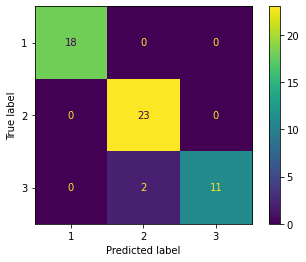

In [256]:
conf_matrix(ytest_tuned, ypred_tuned)

Se pede ver que en la posición [3,2] de la matriz hay un 2, esto quiere decir que el algoritmo predijo 2 en la clase 2, pero el valor real es la clase 3.

Podemos concluir que aún con la ayuda de los hiperparámetros el modelo de **Gaussian naive Bayes** (Ejercicio 1) sigue siendo el mejor pues solo se equivocó en una clase. Pero he de decir que esto no simpre ocurre. Además, el uso de GridSearchCV para ajustar los hiperparámetros siempre nos ayudarán a crear modelos más eficientes.

# Ejercicio 5
Aplique algún proceso de ingeniería para mejorar los resultados (normalización, estandarización, muestreo...)

# Solución

1. Visualización de la correlación de las variables con la columna de predicción **Class label**.

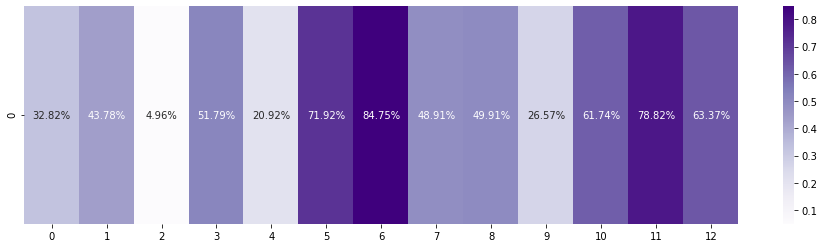

In [279]:
corr_df_class=df.corrwith(df['Class label'])
plt.figure(figsize = (16, 4))
sns.heatmap([np.abs(corr_df_class)],cmap='Purples',annot=True,fmt='.2%');

In [280]:
index_rk=corr_df_class[1:].abs().sort_values(ascending=False)*100
index_rk

Flavanoids                      84.749754
OD280/OD315 of diluted wines    78.822959
Total phenols                   71.916334
Proline                         63.371678
Hue                             61.736921
Alcalinity of ash               51.785911
Proanthocyanins                 49.912982
Nonflavanoid phenols            48.910916
Malic acid                      43.777620
Color intensity                 26.566757
Magnesium                       20.917939
Ash                              4.964322
dtype: float64

2. Escogemos la columnas mejor correlacionas

In [281]:
index_rk.index

Index(['Flavanoids', 'OD280/OD315 of diluted wines', 'Total phenols',
       'Proline', 'Hue', 'Alcalinity of ash', 'Proanthocyanins',
       'Nonflavanoid phenols', 'Malic acid', 'Color intensity', 'Magnesium',
       'Ash'],
      dtype='object')

Recordar que

* flavanoids & total phenols = 0.85 de correlación
* flavanoids & od280/od315_of_diluted_wines = 0.79 de correlación

Para reducir las características, podemos usar sólo los Flavanoids y no utilizar las otras dos.

In [282]:
df5=df[index_rk.index[:]]
df5.head()

,Flavanoids,OD280/OD315 of diluted wines,Total phenols,Proline,Hue,Alcalinity of ash,Proanthocyanins,Nonflavanoid phenols,Malic acid,Color intensity,Magnesium,Ash
0,3.06,3.92,2.80,1065,1.04,15.6,2.29,0.28,1.71,5.64,127,2.43
1,2.76,3.40,2.65,1050,1.05,11.2,1.28,0.26,1.78,4.38,100,2.14
2,3.24,3.17,2.80,1185,1.03,18.6,2.81,0.30,2.36,5.68,101,2.67
3,3.49,3.45,3.85,1480,0.86,16.8,2.18,0.24,1.95,7.80,113,2.50
4,2.69,2.93,2.80,735,1.04,21.0,1.82,0.39,2.59,4.32,118,2.87


In [283]:
X5=df5.drop(df5.columns[[1, 2]], axis=1)
X5.head()

,Flavanoids,Proline,Hue,Alcalinity of ash,Proanthocyanins,Nonflavanoid phenols,Malic acid,Color intensity,Magnesium,Ash
0,3.06,1065,1.04,15.6,2.29,0.28,1.71,5.64,127,2.43
1,2.76,1050,1.05,11.2,1.28,0.26,1.78,4.38,100,2.14
2,3.24,1185,1.03,18.6,2.81,0.30,2.36,5.68,101,2.67
3,3.49,1480,0.86,16.8,2.18,0.24,1.95,7.80,113,2.50
4,2.69,735,1.04,21.0,1.82,0.39,2.59,4.32,118,2.87


3. Graficar boxplots de **X5**.

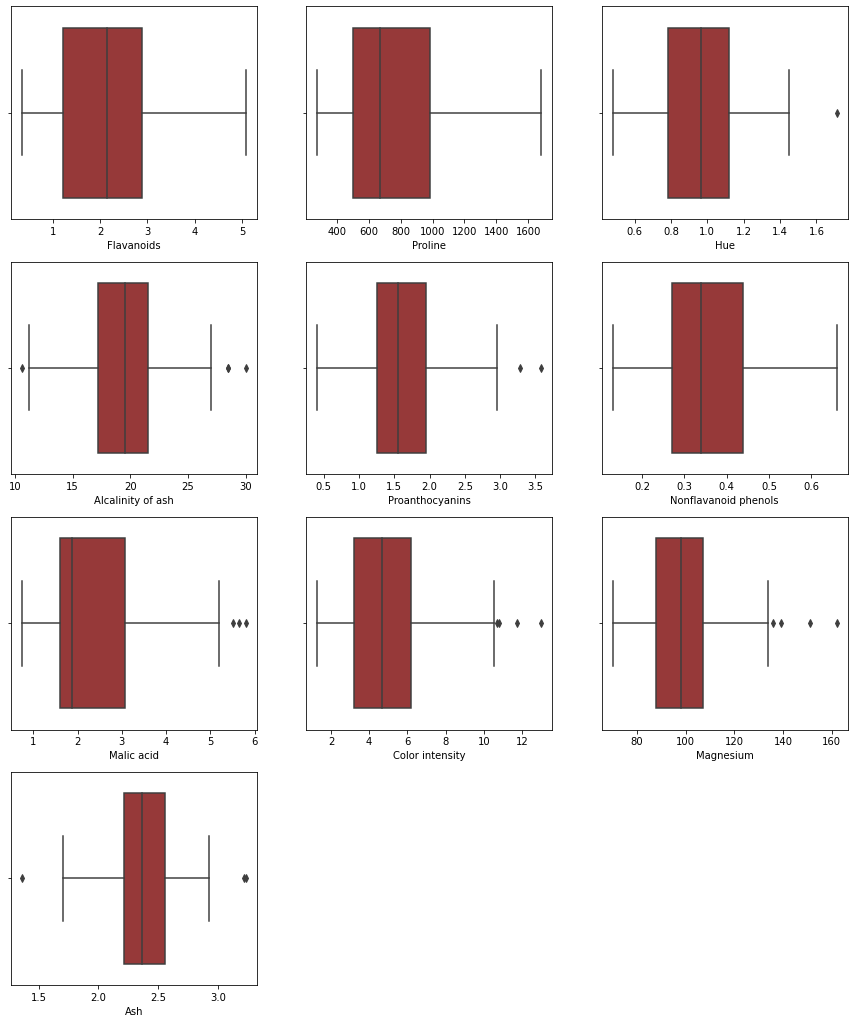

In [284]:
f=plt.figure(figsize=(15,18))
for i , col in zip(range(1,13),X.columns):
    fplot=f.add_subplot(4,3,i)
    sns.boxplot(data=X, x=col,color='brown');

Del gráfico podemos ver que existen algunas variables que presentan valores atípicos

4. Crear lista con variables sin valores atípicos

In [285]:
list_no_outliers = ['Flavanoids','Proline']

5. Crear lista con variables con valores atípicos

In [286]:
list_outliers=list(set(list(X.columns))-set({'Flavanoids','Proline','Nonflavanoid phenols'}))

* Escalar variables:
   * Las outliers con RobustScaler
   * La no outliers con MinMaxScaler

In [287]:
X5[list_no_outliers ] = MinMaxScaler().fit_transform(X5[list_no_outliers ])
X5[list_outliers ] = RobustScaler().fit_transform(X5[list_outliers ])

In [288]:
y5 = df['Class label']

6. Predicción con el modelo  Clasificador SVC obtenido en **Ejercicio 4**.

In [289]:
np.random.seed(0)
ytest_5,ypred_5=class_model(gscv.best_estimator_,X5,y5)

7. Graficar las predicciones

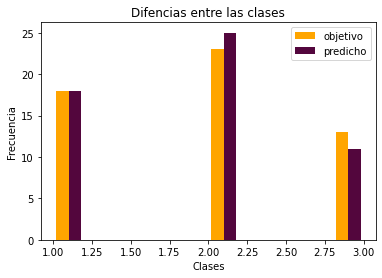

In [290]:
colors = ['orange','#53063d']
plt.hist([ytest_5, ypred_5], color=colors, label=['objetivo', 'predicho'])
plt.legend(loc='upper right')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Difencias entre las clases')
plt.show()

8. Graficar la matriz de confusión

Matriz de confusión


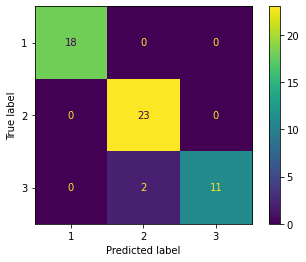

In [291]:
conf_matrix(ytest_5,ypred_5)

<p style='color:#53063d'>Con los nuevos datos obtenidos después de reducir y realizar ciertas transformaciones a las variables, el modelo clasificador (con el mejor estaimador) del <strong>Ejercicio 4</strong> arrojo una buena clasificación,  pues predijo 2 valores en la clase 2, pero pertenecen a la clase 3.</p>